In [1]:
import pandas as pd

data = pd.read_csv('mushrooms.csv')

y = data['class'] 
X = data.drop('class', axis=1) 

print("Labels (y):")
print(y.head())
print("\nFeatures (X):")
print(X.head())


Labels (y):
0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

Features (X):
  cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing  \
0         x           s         n       t    p               f            c   
1         x           s         y       t    a               f            c   
2         b           s         w       t    l               f            c   
3         x           y         w       t    p               f            c   
4         x           s         g       f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring st

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_val.shape, y_val.shape)
print("Testing set size:", X_test.shape, y_test.shape)


Training set size: (5686, 22) (5686,)
Validation set size: (1219, 22) (1219,)
Testing set size: (1219, 22) (1219,)


In [3]:
from sklearn.preprocessing import LabelEncoder

encoders = {col: LabelEncoder() for col in X_train.columns}

for col, encoder in encoders.items():
    X_train[col] = encoder.fit_transform(X_train[col])
    X_val[col] = encoder.transform(X_val[col])
    X_test[col] = encoder.transform(X_test[col])


In [5]:
for col in X_train.columns:
    common_value = X_train[col].mode()[0]
    X_train[col] = X_train[col].fillna(common_value)
    X_val[col] = X_val[col].fillna(common_value)
    X_test[col] = X_test[col].fillna(common_value)


In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 1.0


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

best_dt = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
best_dt.fit(X_train, y_train)

y_val_pred = best_dt.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, pos_label='p')
recall = recall_score(y_val, y_val_pred, pos_label='p')
f1 = f1_score(y_val, y_val_pred, pos_label='p')
conf_matrix = confusion_matrix(y_val, y_val_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[636   0]
 [  0 583]]


In [8]:
y_test_pred = best_dt.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, pos_label='p')
recall_test = recall_score(y_test, y_test_pred, pos_label='p')
f1_test = f1_score(y_test, y_test_pred, pos_label='p')
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print("Test Set Accuracy:", accuracy_test)
print("Test Set Precision:", precision_test)
print("Test Set Recall:", recall_test)
print("Test Set F1 Score:", f1_test)
print("Test Set Confusion Matrix:\n", conf_matrix_test)


Test Set Accuracy: 1.0
Test Set Precision: 1.0
Test Set Recall: 1.0
Test Set F1 Score: 1.0
Test Set Confusion Matrix:
 [[621   0]
 [  0 598]]


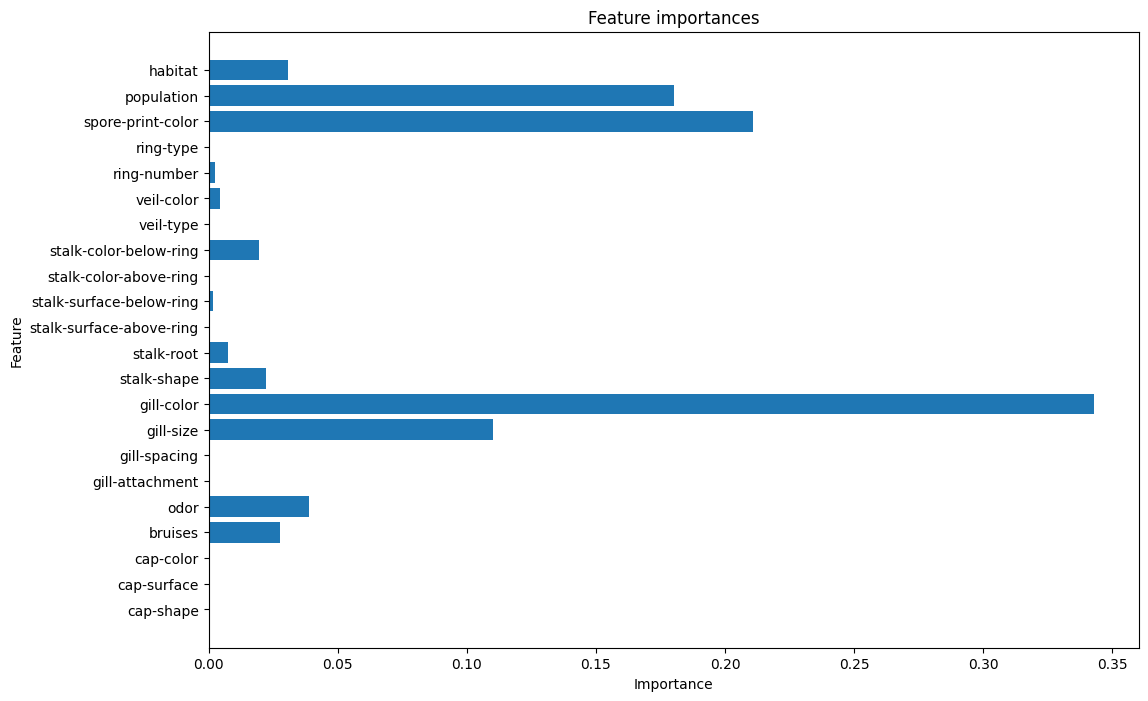

In [9]:
import matplotlib.pyplot as plt

importances = best_dt.feature_importances_

plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.barh(X_train.columns, importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


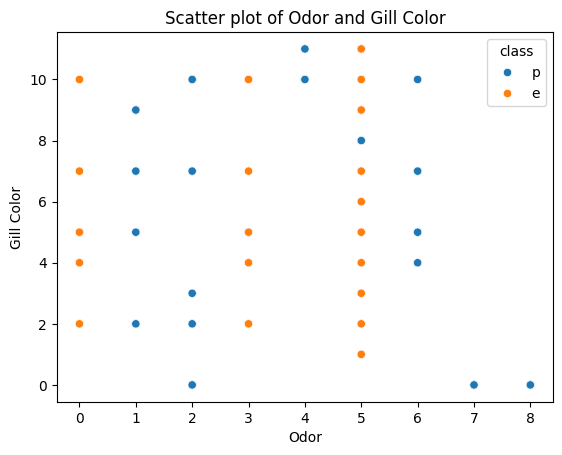

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=X_train['odor'], y=X_train['gill-color'], hue=y_train)
plt.title('Scatter plot of Odor and Gill Color')
plt.xlabel('Odor')
plt.ylabel('Gill Color')
plt.show()


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train_combined = X_train[['odor', 'gill-color', 'spore-print-color']]
X_val_combined = X_val[['odor', 'gill-color', 'spore-print-color']]

dt_combined = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2)
dt_combined.fit(X_train_combined, y_train)

y_val_pred_combined = dt_combined.predict(X_val_combined)
print(classification_report(y_val, y_val_pred_combined))


              precision    recall  f1-score   support

           e       0.99      1.00      0.99       636
           p       1.00      0.99      0.99       583

    accuracy                           0.99      1219
   macro avg       0.99      0.99      0.99      1219
weighted avg       0.99      0.99      0.99      1219



In [12]:
from scipy.stats import chi2_contingency
import pandas as pd

contingency_table = pd.crosstab(X_train['odor'], y_train)

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square test result for Odor and Class: chi2 = {chi2}, p-value = {p}")


Chi-square test result for Odor and Class: chi2 = 5372.065601292593, p-value = 0.0


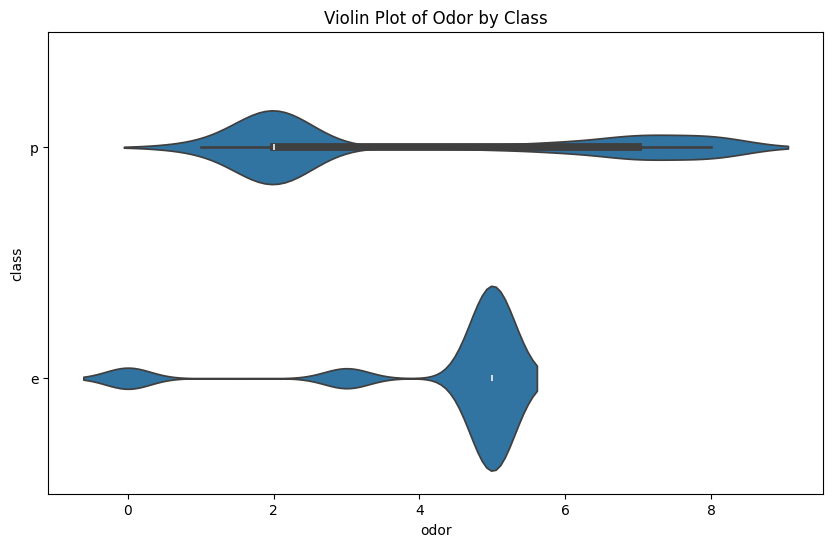

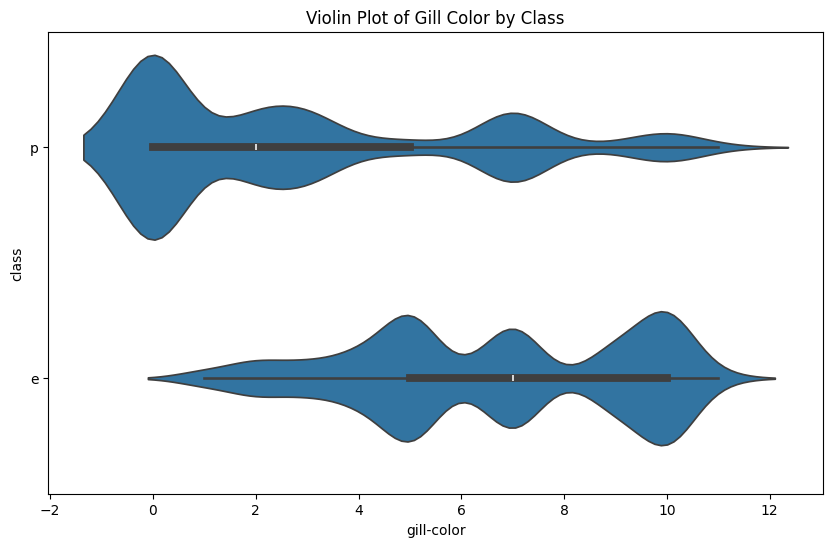

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x=X_train['odor'], y=y_train, data=X_train)
plt.title('Violin Plot of Odor by Class')
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x=X_train['gill-color'], y=y_train, data=X_train)
plt.title('Violin Plot of Gill Color by Class')
plt.show()


In [14]:
X_train['odor_gill_color_interaction'] = X_train['odor'] * X_train['gill-color']
X_val['odor_gill_color_interaction'] = X_val['odor'] * X_val['gill-color']

dt_refined = DecisionTreeClassifier(criterion='gini', max_depth=None)
dt_refined.fit(X_train[['odor', 'gill-color', 'odor_gill_color_interaction']], y_train)
y_val_pred_refined = dt_refined.predict(X_val[['odor', 'gill-color', 'odor_gill_color_interaction']])
print(classification_report(y_val, y_val_pred_refined))


              precision    recall  f1-score   support

           e       0.98      1.00      0.99       636
           p       1.00      0.98      0.99       583

    accuracy                           0.99      1219
   macro avg       0.99      0.99      0.99      1219
weighted avg       0.99      0.99      0.99      1219



In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

features = ['odor', 'gill-color', 'spore-print-color']
X_train_simplified = X_train[features]
X_val_simplified = X_val[features]
X_test_simplified = X_test[features]

dt_simplified = DecisionTreeClassifier(criterion='gini', max_depth=None)
dt_simplified.fit(X_train_simplified, y_train)

y_val_pred_simplified = dt_simplified.predict(X_val_simplified)
print("Validation Results for Simplified Model:")
print(classification_report(y_val, y_val_pred_simplified))

y_test_pred_simplified = dt_simplified.predict(X_test_simplified)
accuracy_simplified = accuracy_score(y_test, y_test_pred_simplified)
print("Test Set Accuracy:", accuracy_simplified)


Validation Results for Simplified Model:
              precision    recall  f1-score   support

           e       0.99      1.00      0.99       636
           p       1.00      0.99      0.99       583

    accuracy                           0.99      1219
   macro avg       0.99      0.99      0.99      1219
weighted avg       0.99      0.99      0.99      1219

Test Set Accuracy: 0.992616899097621
